In [1]:
#importing in libraries

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sn


In [2]:
#importing dataset to base dataframe in pandas
df = pd.read_csv('CandidateSummaryAction1.csv')

In [3]:
cont = df['net_con']
cash = df['cas_on_han_beg_of_per']
nu_con = cont.isnull().sum()
nu_cash = cash.isnull().sum()


In [4]:
#quick overview
df.head(2)

,can_id,can_nam,can_off,can_off_sta,can_off_dis,can_par_aff,can_inc_cha_ope_sea,can_str1,can_str2,can_cit,...,cas_on_han_beg_of_per,cas_on_han_clo_of_per,net_con,net_ope_exp,deb_owe_by_com,deb_owe_to_com,cov_sta_dat,cov_end_dat,winner,votes
0,H2GA12121,"ALLEN, RICHARD W",H,GA,12.0,REP,INCUMBENT,2237 PICKENS RD,NaN,AUGUSTA,...,"$60,109.57","$175,613.35","$1,074,949.50","$907,156.21","$1,125,000.00",NaN,1/1/2015,10/19/2016,Y,158708.0
1,H6PA02171,"EVANS, DWIGHT",H,PA,2.0,DEM,CHALLENGER,PO BOX 6578,NaN,PHILADELPHIA,...,NaN,"$105,687.23","$1,406,719.06","$1,298,831.83",NaN,NaN,11/2/2015,10/19/2016,Y,310770.0


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1814 entries, 0 to 1813
Data columns (total 51 columns):
can_id                   1814 non-null object
can_nam                  1814 non-null object
can_off                  1814 non-null object
can_off_sta              1814 non-null object
can_off_dis              1812 non-null float64
can_par_aff              1813 non-null object
can_inc_cha_ope_sea      1812 non-null object
can_str1                 1789 non-null object
can_str2                 122 non-null object
can_cit                  1813 non-null object
can_sta                  1806 non-null object
can_zip                  1789 non-null float64
ind_ite_con              1570 non-null object
ind_uni_con              1538 non-null object
ind_con                  1616 non-null object
par_com_con              382 non-null object
oth_com_con              1011 non-null object
can_con                  675 non-null object
tot_con                  1695 non-null object
tra_fro_oth_aut_com 

In [6]:
df.columns

Index(['can_id', 'can_nam', 'can_off', 'can_off_sta', 'can_off_dis',
       'can_par_aff', 'can_inc_cha_ope_sea', 'can_str1', 'can_str2', 'can_cit',
       'can_sta', 'can_zip', 'ind_ite_con', 'ind_uni_con', 'ind_con',
       'par_com_con', 'oth_com_con', 'can_con', 'tot_con',
       'tra_fro_oth_aut_com', 'can_loa', 'oth_loa', 'tot_loa',
       'off_to_ope_exp', 'off_to_fun', 'off_to_leg_acc', 'oth_rec', 'tot_rec',
       'ope_exp', 'exe_leg_acc_dis', 'fun_dis', 'tra_to_oth_aut_com',
       'can_loa_rep', 'oth_loa_rep', 'tot_loa_rep', 'ind_ref', 'par_com_ref',
       'oth_com_ref', 'tot_con_ref', 'oth_dis', 'tot_dis',
       'cas_on_han_beg_of_per', 'cas_on_han_clo_of_per', 'net_con',
       'net_ope_exp', 'deb_owe_by_com', 'deb_owe_to_com', 'cov_sta_dat',
       'cov_end_dat', 'winner', 'votes'],
      dtype='object')

In [7]:
#Dropping name and mailing address information.
col = ['can_nam', 'can_str1', 'can_str2', 'can_cit', 'can_sta', 'can_zip']

df.drop(col, axis=1, inplace=True)

df.columns

Index(['can_id', 'can_off', 'can_off_sta', 'can_off_dis', 'can_par_aff',
       'can_inc_cha_ope_sea', 'ind_ite_con', 'ind_uni_con', 'ind_con',
       'par_com_con', 'oth_com_con', 'can_con', 'tot_con',
       'tra_fro_oth_aut_com', 'can_loa', 'oth_loa', 'tot_loa',
       'off_to_ope_exp', 'off_to_fun', 'off_to_leg_acc', 'oth_rec', 'tot_rec',
       'ope_exp', 'exe_leg_acc_dis', 'fun_dis', 'tra_to_oth_aut_com',
       'can_loa_rep', 'oth_loa_rep', 'tot_loa_rep', 'ind_ref', 'par_com_ref',
       'oth_com_ref', 'tot_con_ref', 'oth_dis', 'tot_dis',
       'cas_on_han_beg_of_per', 'cas_on_han_clo_of_per', 'net_con',
       'net_ope_exp', 'deb_owe_by_com', 'deb_owe_to_com', 'cov_sta_dat',
       'cov_end_dat', 'winner', 'votes'],
      dtype='object')

In [8]:
#clean up - converts money values to 'float' as a string to be converted in dtype later.
df['tot_dis'] = df['net_ope_exp'].str.replace("$","").str.replace(",","").str.replace("(","-").str.replace(")","")
df['net_ope_exp'] = df['net_ope_exp'].str.replace("$","").str.replace(",","").str.replace("(","-").str.replace(")","")
df['net_con'] = df['net_con'].str.replace("$","").str.replace(",","").str.replace("(","-").str.replace(")","")
df['cas_on_han_beg_of_per']= df['cas_on_han_beg_of_per'].str.replace("$","").str.replace(",","").str.replace("(","-").str.replace(")","")
df['cas_on_han_clo_of_per']= df['cas_on_han_clo_of_per'].str.replace("$","").str.replace(",","").str.replace("(","-").str.replace(")","")
df['tot_loa']= df['tot_loa'].str.replace("$","").str.replace(",","").str.replace("(","-").str.replace(")","")
df['can_loa'] = df['can_loa'].str.replace("$","").str.replace(",","").str.replace("(","-").str.replace(")","")
df['ind_ite_con']=df['ind_ite_con'].str.replace("$","").str.replace(",","").str.replace("(","-").str.replace(")","")
df['ind_uni_con']=df['ind_uni_con'].str.replace("$","").str.replace(",","").str.replace("(","-").str.replace(")","")
df['ind_con']=df['ind_con'].str.replace("$","").str.replace(",","").str.replace("(","-").str.replace(")","")

In [9]:
#checking - still same null value sum
nu_con_2 = cont.isnull().sum()

In [10]:
nu_cash_2 = cash.isnull().sum()

In [11]:
#drop all rows where contributions or cash on hand are null
df = df.dropna(subset = ['net_con'])
df = df.dropna(subset = ['cas_on_han_beg_of_per'])

In [12]:
#filling in NaN of non winners with N and then turning  winner and net_con into numerical value
df['winner'] = df['winner'].fillna('N')
df['winner'] = df['winner'].eq('Y').mul(1)
df['net_con'] = pd.to_numeric(df['net_con'])
df['cas_on_han_beg_of_per'] = pd.to_numeric(df['cas_on_han_beg_of_per'])

df.head(2)

,can_id,can_off,can_off_sta,can_off_dis,can_par_aff,can_inc_cha_ope_sea,ind_ite_con,ind_uni_con,ind_con,par_com_con,...,cas_on_han_beg_of_per,cas_on_han_clo_of_per,net_con,net_ope_exp,deb_owe_by_com,deb_owe_to_com,cov_sta_dat,cov_end_dat,winner,votes
0,H2GA12121,H,GA,12.0,REP,INCUMBENT,554305.00,46969.50,601274.50,NaN,...,60109.57,175613.35,1074949.50,907156.21,"$1,125,000.00",NaN,1/1/2015,10/19/2016,1,158708.0
3,H4MT01041,H,MT,0.0,REP,INCUMBENT,2479616.45,1837715.13,4317331.58,"$3,545.32",...,83815.78,399122.61,4938943.74,5055942.15,NaN,NaN,1/1/2015,10/19/2016,1,280476.0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 659 entries, 0 to 1812
Data columns (total 45 columns):
can_id                   659 non-null object
can_off                  659 non-null object
can_off_sta              659 non-null object
can_off_dis              658 non-null float64
can_par_aff              658 non-null object
can_inc_cha_ope_sea      658 non-null object
ind_ite_con              633 non-null object
ind_uni_con              625 non-null object
ind_con                  644 non-null object
par_com_con              195 non-null object
oth_com_con              514 non-null object
can_con                  136 non-null object
tot_con                  658 non-null object
tra_fro_oth_aut_com      195 non-null object
can_loa                  118 non-null object
oth_loa                  16 non-null object
tot_loa                  123 non-null object
off_to_ope_exp           437 non-null object
off_to_fun               0 non-null object
off_to_leg_acc           0 non-null objec

In [14]:
#separating out winners for viz
allwin = df[df.winner == 1]
swin = allwin[allwin.can_off == "S"]
hwin = allwin[allwin.can_off == "H"]

In [15]:
#net contributions of winning campaigns fir vuz
allwcon = allwin['net_con']
swcon = swin['net_con']
hwcon = hwin['net_con']

In [16]:
#cash on hand for winning campaigns
allwcash = allwin['cas_on_han_beg_of_per']
swcash = swin['cas_on_han_beg_of_per']
hw = hwin['cas_on_han_beg_of_per'] 

In [17]:
#plots and EDA 

In [18]:
#Logistic regression modeling 
X = df.iloc[:,[35, 37]].values
y = df.iloc[:, 43].values

#train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [19]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [20]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [21]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [22]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

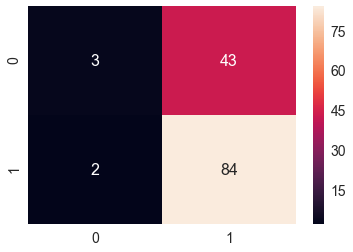

In [23]:
#Viz matrix
sn.set(font_scale=1.4)#for label size
sn.heatmap(cm, annot=True,annot_kws={"size": 16})# font size

In [24]:
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 3)
acc = accuracies.mean() 
accuracies.std() 

0.12723143582474647

In [25]:
#viz train and test results

#Random forest classification modeling

# Splitting the dataset into the Training set and Test set
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X, y, test_size = 0.2)

In [26]:
# Feature Scaling
#sc = StandardScaler()
X_train_rf = sc.fit_transform(X_train_rf)
X_test_rf = sc.transform(X_test_rf)

In [27]:
# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier(n_estimators = 10, criterion = 'entropy')
classifier_rf.fit(X_train_rf, y_train_rf)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [28]:
# Predicting the Test set results
y_pred_rf = classifier_rf.predict(X_test_rf)

In [29]:
# Making the Confusion Matrix
cm_rf = confusion_matrix(y_test_rf, y_pred_rf)

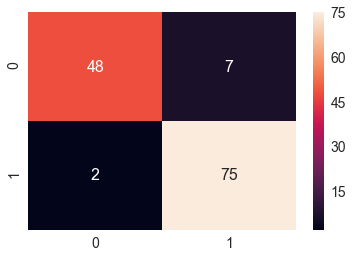

In [30]:
#Viz matrix
sn.set(font_scale=1.4)#for label size
sn.heatmap(cm_rf, annot=True,annot_kws={"size": 16})# font size

In [31]:
# Applying k-Fold Cross Validation
accuracies_rf = cross_val_score(estimator = classifier_rf, X = X_train_rf, y = y_train_rf, cv = 3)
acc_rf = accuracies_rf.mean() 
accuracies_rf.std() 

0.011705644915968814

In [33]:
#viz train and test results


#XGboost modeling

# Splitting the dataset into the Training set and Test set
X_train_xg, X_test_xg, y_train_xg, y_test_xg = train_test_split(X, y, test_size = 0.2)

In [42]:
# Fitting XGBoost to the Training set
from xgboost import XGBClassifier
classifier_xg = XGBClassifier()
classifier_xg.fit(X_train_xg, y_train_xg)

UnboundLocalError: local variable 'lib' referenced before assignment

In [43]:
# Predicting the Test set results
y_pred_xg = classifier.predict(X_test_xg)

In [44]:
# Making the Confusion Matrix
cm_xg = confusion_matrix(y_test_xg, y_pred_xg)

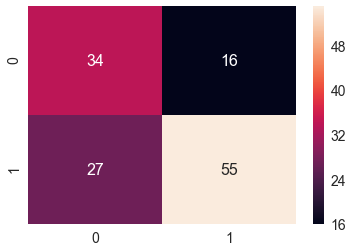

In [45]:
#Viz matrix
sn.set(font_scale=1.4)#for label size
sn.heatmap(cm_xg, annot=True,annot_kws={"size": 16})# font size

In [46]:
# Applying k-Fold Cross Validation
accuracies_xg = cross_val_score(estimator = classifier_xg, X = X_train_xg, y = y_train_xg, cv = 3)
acc_xg = accuracies_xg.mean()
accuracies_xg.std()

NameError: name 'classifier_xg' is not defined

In [47]:
#viz train and test results

#Viz all the acc off k-folds

obj = ['Logistic', 'Random Forest', 'XGBoost']
y_pos = np.arange(len(obj))
means = [acc, acc_rf, acc_xg]

 
plt.bar(y_pos, means, align='center', alpha=0.5)
plt.xticks(y_pos, obj)
plt.ylabel('Mean of accuracies')
plt.title('K-fold comparison across models')
 
plt.show()

NameError: name 'acc_xg' is not defined

In [48]:
#Tuning XGBoost as most accurate model's hyperparams 

# Applying Grid Search for hyperparams 
from sklearn.model_selection import GridSearchCV
parameters = [{'booster': ['gbtree','dart'], 'gamma':['0','0.1','0.5','1','5']}]
grid_search = GridSearchCV(estimator = classifier_xg,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 3,
                           n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

#Gamma seems to vary based on sample from 0-5

NameError: name 'classifier_xg' is not defined